# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("чтобы функция, генерирующая случайные значения, выдавала одни и те же случайные значения")

чтобы функция, генерирующая случайные значения, выдавала одни и те же случайные значения


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
display(df_train.describe(include = ['object']),\
        df_train.describe(include = ['int64','float64']),df_train.dtypes)


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
display(df_test.describe(include = ['object']), df_test.describe(include = ['int64','float64']))

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

### <font color='#FF6600'>mileage, engine, max_power, torque, seats</font>

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
df_train.drop('selling_price', axis=1).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
df_train[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first', inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace = True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
train_test = [df_train, df_test]
for x in train_test:
    
    x['engine'] = x['engine'].str.replace('CC', '')
    x['max_power'] = x['max_power'].str.replace('bhp', '')
    
    
    x['mileage'] = np.where(x['mileage'].str.contains('km/kg'), \
            pd.to_numeric(x['mileage'].str.replace('km/kg', ''), errors = 'coerce') * 1.4,\
            pd.to_numeric(x['mileage'].str.replace('kmpl', ''), errors = 'coerce'))
    
    x['engine'] = pd.to_numeric(x['engine'], errors = 'coerce')
    x['max_power'] = pd.to_numeric(x['max_power'], errors = 'coerce')    
    x.drop('torque', axis=1, inplace=True)
display(df_train, df_test)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


In [15]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [16]:
cols = ['mileage', 'engine', 'max_power', 'seats']
for col in cols:
    m = df_train[col].mean()
    df_train[col].fillna(m, inplace=True)
    df_test[col].fillna(m, inplace=True)
display(df_train.isna().sum(), df_test.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [17]:
print("Потому что агрегирующие функции \
категориальных типов в данном случае лучше подходят для описания количества сидений")

Потому что агрегирующие функции категориальных типов в данном случае лучше подходят для описания количества сидений


In [18]:
for x in train_test:
    x['engine'] = x['engine'].astype(int)
    x['seats'] = x['seats'].astype(int)
display(df_train.dtypes, df_test.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats              int32
dtype: object

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats              int32
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

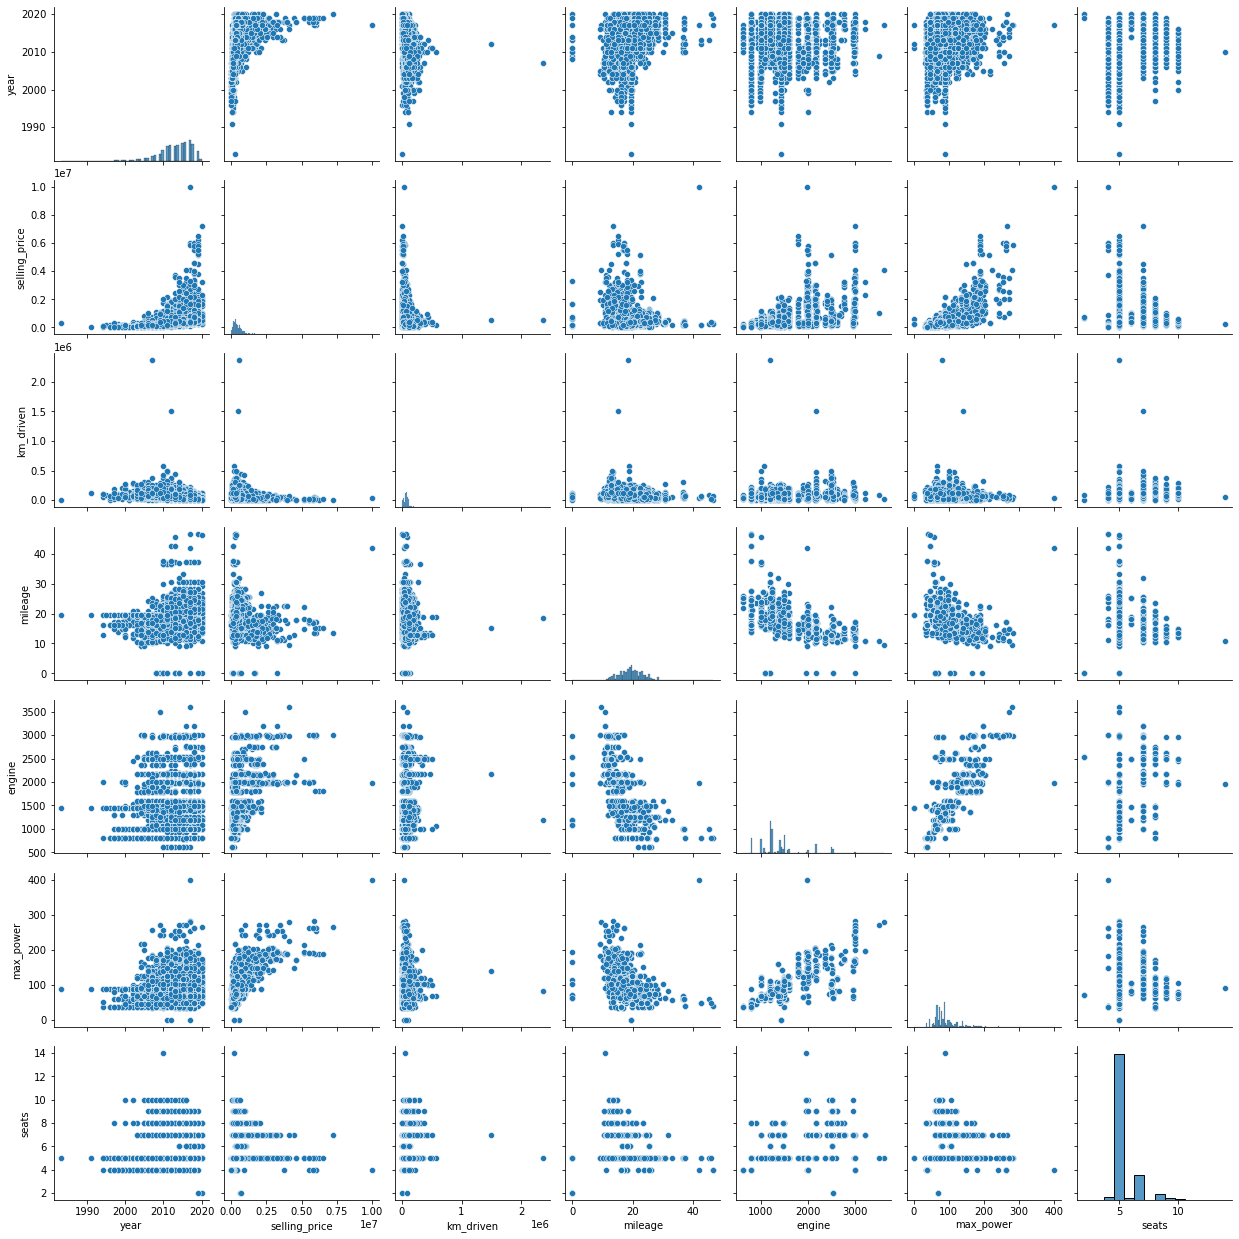

In [19]:
sns.pairplot(df_train.select_dtypes(include=['int64','int32','float64']))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [20]:
print('''- year: новых дорогих машин больше чем не новых
- km_driven: дорогих машин с низким пробегом значительно больше
- mileage: сложно сказать что-то однозначное
- чем больше engine, тем больше selling price 
- max_power: более мощные автомобили более дорогие

- чем мощнее автомобиль, тем выше потребление бензина
- прямая корреляция engine и max_power
- пятидверных автомобилей больше всего''')

- year: новых дорогих машин больше чем не новых
- km_driven: дорогих машин с низким пробегом значительно больше
- mileage: сложно сказать что-то однозначное
- чем больше engine, тем больше selling price 
- max_power: более мощные автомобили более дорогие

- чем мощнее автомобиль, тем выше потребление бензина
- прямая корреляция engine и max_power
- пятидверных автомобилей больше всего


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

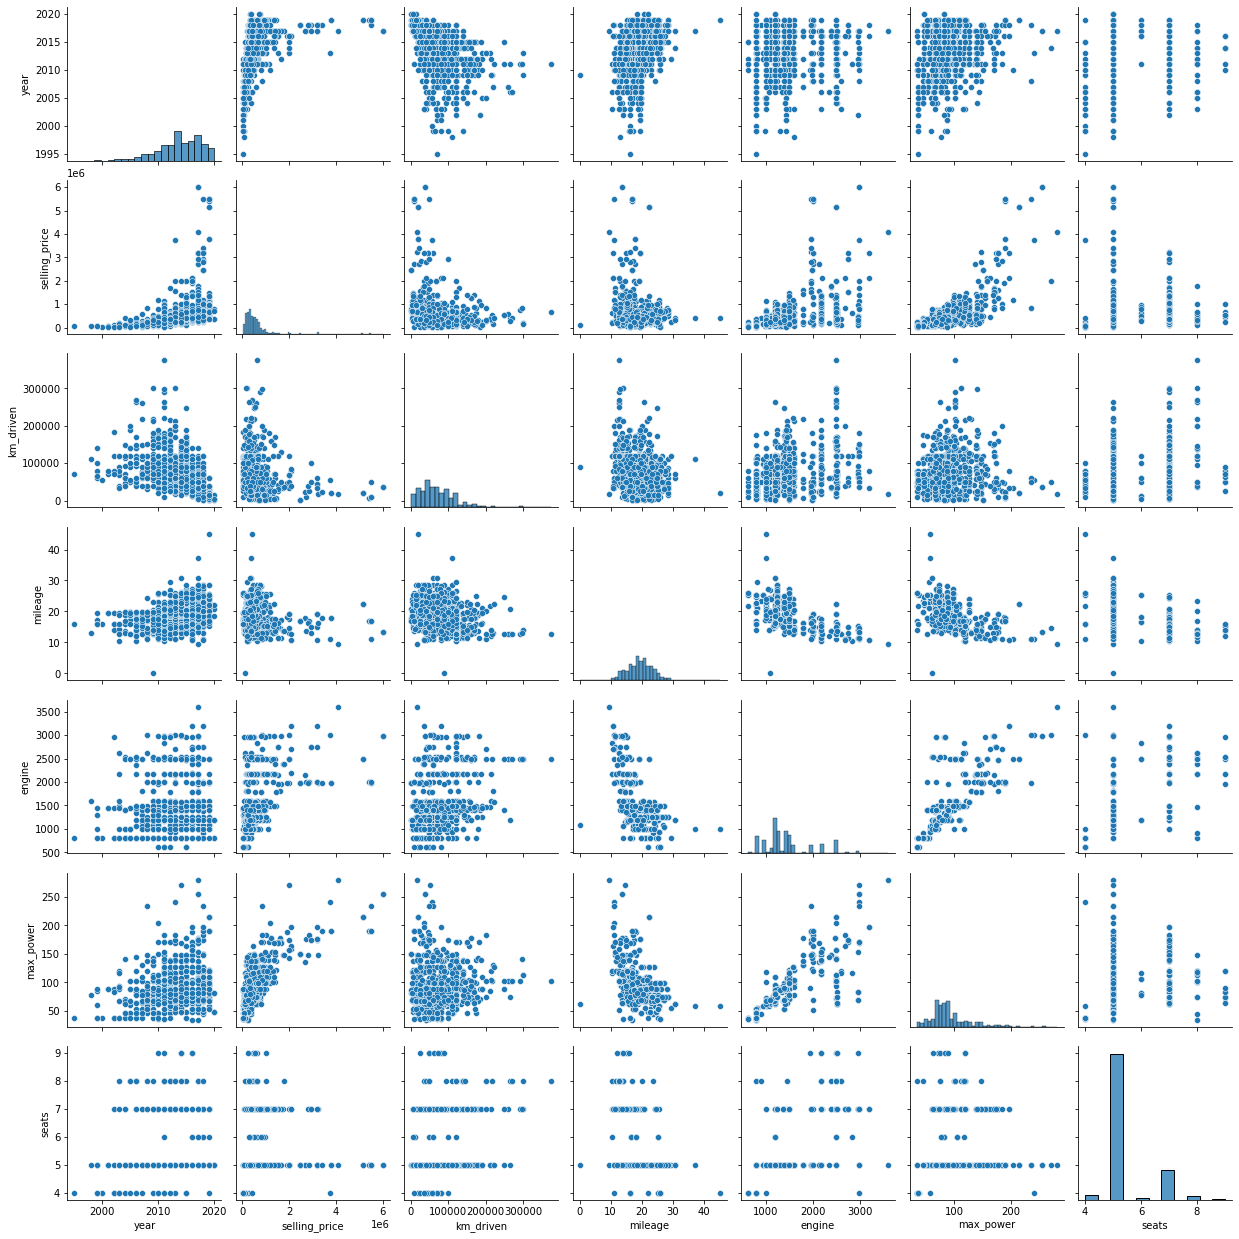

In [21]:
sns.pairplot(df_test.select_dtypes(include=['int64','int32','float64']))

In [22]:
print('Да, оказались похожими')

Да, оказались похожими


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

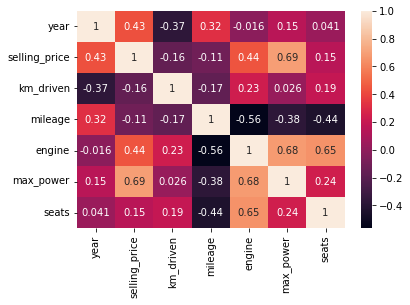

In [23]:
sns.heatmap(df_train.select_dtypes(\
            include=['int64','int32','float64']).corr(),annot = True)


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [24]:
print('''- mileage и engine
- selling price и max power
- в целом да''')

- mileage и engine
- selling price и max power
- в целом да


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'max_power')

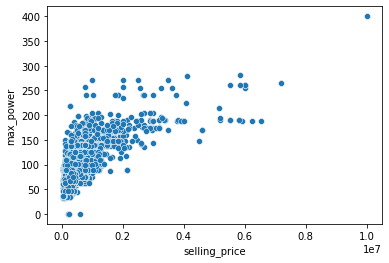

In [25]:
sns.scatterplot(
    x='selling_price', 
    y='max_power', 
    data=df_train)
plt.xlabel(
    'selling_price')
plt.ylabel(
    'max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [26]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [27]:
y_train = df_train['selling_price']
X_train = df_train[['year','km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [28]:
assert X_train.shape == (5840, 6)

In [29]:
y_test = df_test['selling_price']
X_test = df_test[['year','km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [30]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

pred_mse = model.predict(X_test)

print(f'''r2_score на тесте = {r2_score(y_test, pred_mse)}
r2_score на трейне = {r2_score(y_train, model.predict(X_train))}
MSE на тесте = {MSE(y_test, pred_mse)}
MSE на трейне = {MSE(y_train, model.predict(X_train))}
''')

# your code here

r2_score на тесте = 0.5939575077511783
r2_score на трейне = 0.5921547456377132
MSE на тесте = 233404819347.22443
MSE на трейне = 116904086017.55548



Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [32]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
wow_norm_np = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=wow_norm_np)

wow_norm_np = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=wow_norm_np)

display(X_train, X_test)

,0,1,2,3,4,5
0,0.139570,1.191152,0.910162,-0.386797,-0.446033,-0.434419
1,0.139570,0.766619,0.375611,0.129194,0.487586,-0.434419
2,-0.837167,0.883158,0.815552,-0.081330,0.059994,-0.434419
3,-1.569719,0.766619,-0.816486,-0.283598,0.003066,-0.434419
4,0.872122,-0.482007,0.139084,-0.492059,-0.197447,-0.434419
...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.386007,-0.721159,-0.822390,-0.434419
5836,-0.104614,-0.398765,-0.154210,-0.902787,-0.664257,-0.434419
5837,-0.104614,0.600136,-0.248821,-0.492059,-0.166137,-0.434419
5838,-1.569719,0.749971,-0.650917,0.118874,0.692526,-0.434419


,0,1,2,3,4,5
0,-0.917923,1.993453,-1.325000,1.995530,0.603622,1.750206
1,0.827651,-0.957314,0.509481,0.074040,0.503208,-0.441661
2,-1.666026,3.034744,-1.594057,0.653750,1.120035,-0.441661
3,0.328916,2.096627,1.390032,0.075959,0.219181,-0.441661
4,-0.668555,-0.028751,-0.713506,-0.549821,-0.744791,-0.441661
...,...,...,...,...,...,...
995,-1.416658,0.590291,0.096111,-0.714904,-0.657288,-0.441661
996,0.827651,-0.441446,-0.199852,-0.501831,-0.261945,-0.441661
997,-1.167290,-0.647793,0.876377,-0.119837,-0.027550,-0.441661
998,-0.419187,-0.957314,0.230640,-0.501831,-0.346005,-0.441661


In [33]:
model_standard = LinearRegression()
model_standard.fit(X_train, y_train)

print(model_standard.coef_)

pred_stand = model_standard.predict(X_test)

print(f'r2_score на тесте = {r2_score(y_test, pred_stand)}')

[158596.45309973 -43352.56610783  27081.23443791  60814.52964807
 321505.83243946 -23184.96285853]
r2_score на тесте = 0.5654160787533788


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [34]:
print('Максимальная мощность')

Максимальная мощность


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [35]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=0.002)
model_Lasso.fit(X_train, y_train)

pred_mse_Lasso = model_Lasso.predict(X_test)

print(f'''Lasso-регрессия:
r2_score на тесте  = {r2_score(y_test, pred_mse_Lasso)}
r2_score на трейне = {r2_score(y_train, model_Lasso.predict(X_train))}
MSE на тесте = {MSE(y_test.values, pred_mse_Lasso)}
MSE на трейне = {MSE(y_train, model_Lasso.predict(X_train))}
''')

Lasso-регрессия:
r2_score на тесте  = 0.5654160762273917
r2_score на трейне = 0.5921547456377121
MSE на тесте = 249811249205.8963
MSE на трейне = 116904086017.55579



<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [36]:
print(model_Lasso.coef_, model_standard.coef_)

[158596.45244679 -43352.5638867   27081.23081511  60814.52008735
 321505.8342094  -23184.95707288] [158596.45309973 -43352.56610783  27081.23443791  60814.52964807
 321505.83243946 -23184.96285853]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [37]:
from sklearn.model_selection import GridSearchCV


gs = GridSearchCV(estimator=Lasso(), param_grid=\
                  {"alpha": 10.0 ** np.arange(-5, 6, 0.5)}, cv = 10)

gs.fit(X_train, y_train)

gs.best_score_, gs.best_estimator_

(0.5746824753941622, Lasso(alpha=31622.776601683792))

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [38]:
print(f'len(np.arange(-5, 6, 0.5)) * cv = \
{len(np.arange(-5, 6, 0.5))} * 10 = {len(np.arange(-5, 6, 0.5))*10} обучено моделей')

len(np.arange(-5, 6, 0.5)) * cv = 22 * 10 = 220 обучено моделей


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [39]:
model_GS = gs.best_estimator_

model_GS.fit(X_train, y_train)

Lasso(alpha=31622.776601683792)

In [40]:
print(f'''У лучшей из перебранных моделей коэффициент регуляризации = \
{gs.best_params_["alpha"]}
При такой регуляризации выходят такие коээфициенты: 
{model_GS.coef_}
Занулились mileage, engine, и seats''')

У лучшей из перебранных моделей коэффициент регуляризации = 31622.776601683792
При такой регуляризации выходят такие коээфициенты: 
[146475.40553725 -10945.72160453      0.              0.
 316359.76870171     -0.        ]
Занулились mileage, engine, и seats


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [41]:
from sklearn.linear_model import ElasticNet

gs_en = GridSearchCV(estimator=ElasticNet(), param_grid=\
        {"alpha": 10.0 ** np.arange(-5, 6, 0.5), "l1_ratio": np.arange(0.001, 1.001, 0.1)},\
                     cv = 10)

gs_en.fit(X_train, y_train)

gs_en.best_score_, gs_en.best_estimator_

(0.5767021983255389, ElasticNet(alpha=0.31622776601683794, l1_ratio=0.501))

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [42]:
print(f'''Гиперпараметры соответствующие лучшей из перебранных моделей: 
{gs_en.best_params_}''')

Гиперпараметры соответствующие лучшей из перебранных моделей: 
{'alpha': 0.31622776601683794, 'l1_ratio': 0.501}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [43]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)

In [44]:
assert X_train_cat.shape == (5840, 10)

In [45]:
X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [46]:
# from sklearn.preprocessing import OneHotEncoder 
# или можно использовать get_dummies из библиотеки pandas
X_dum = pd.get_dummies(X_train_cat, drop_first=True)

print(X_dum.shape)
X_dum.head()

(5840, 23)


C:\Users\Grish\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gs_dum_ridge = GridSearchCV(estimator=Ridge(), param_grid=\
            {"alpha": np.arange(0.01, 10.01, 0.5)},scoring='r2', cv = 10)

gs_dum_ridge.fit(X_dum, y_train)

gs_dum_ridge.best_score_, gs_dum_ridge.best_estimator_

(0.6227468379317617, Ridge(alpha=7.01))

In [48]:
print('Да, удалось')

Да, удалось


In [49]:
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

X_test_cat['seats'] = X_test_cat['seats'].astype('object')
X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)

missing_cols = set( X_dum.columns ) - set( X_dum_test.columns )
for c in missing_cols:
    X_dum_test[c] = 0
X_dum_test = X_dum_test.reindex(columns = X_dum.columns, fill_value=0)



C:\Users\Grish\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [60]:
model_dum_ridge = gs_dum_ridge.best_estimator_

model_dum_ridge.fit(X_dum, y_train)
pred_dum_ridge = model_dum_ridge.predict(X_dum_test)
pred_dum_ridge2 = pred_dum_ridge.copy()
for i in range(len(pred_dum_ridge)):
    pred_dum_ridge2[i] = max(0, pred_dum_ridge[i])
print(f'''Ридж регрессия после ванхота и нормализации:
r2_score на тесте  = {r2_score(y_test, pred_dum_ridge)}
Ридж регрессия2 после ванхота и нормализации:
r2_score на тесте  = {r2_score(y_test, pred_dum_ridge2)}''')

Ридж регрессия после ванхота и нормализации:
r2_score на тесте  = 0.6403279558206629
Ридж регрессия2 после ванхота и нормализации:
r2_score на тесте  = 0.6526576407109206


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [105]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [110]:
def business_metrics(y_true, y_pred, diff=10):
    n = 0
    m = 0
    for i in range(len(y_pred)):
        if (1-diff/100) <= y_pred[i]/y_true[i] <= (1+diff/100):
            n+=1
    return (n/len(y_pred))



In [111]:
business_metrics(y_test, pred_dum_ridge, 10)

0.255

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [52]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
async def predict_item(item: Item) -> float:
    item_pd = pd.Dataframe(dict(item))
    
    
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link